Representação gráfica

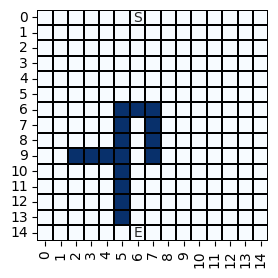

Algoritmo A*

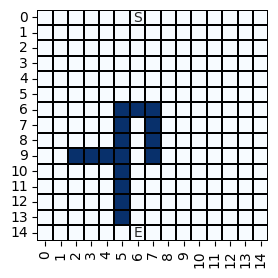

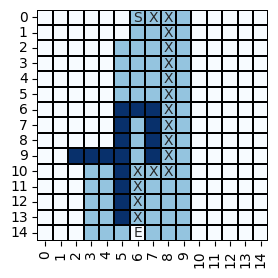

ops: ['N', 'N', 'N', 'N', 'L', 'L', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'O', 'O']
quant estados: 1824


In [ ]:
import copy
def aplica_operacao(estado,op):
  ncolunas=estado["mapa"]["terreno"].shape[1]
  nlinhas=estado["mapa"]["terreno"].shape[0]
  pos=estado["caminho"][-1]
  ops={"N":(-1,0),"S":(1,0),"L":(0,1),"O":(0,-1)}
  passo=(pos[0]+ops[op][0],pos[1]+ops[op][1])
  novo_caminho=copy.deepcopy(estado["caminho"])+[passo]
  novo_estado={"mapa":mapa,"caminho":novo_caminho}
  return novo_estado


def get_ops_validas(estado):
  ncolunas=estado["mapa"]["terreno"].shape[1]
  nlinhas=estado["mapa"]["terreno"].shape[0]
  pos=estado["caminho"][-1]
  ops={"N":(-1,0),"S":(1,0),"L":(0,1),"O":(0,-1)}
  ops_validas=[]
  for op in ops:
    nova_pos=(pos[0]+ops[op][0],pos[1]+ops[op][1])
    if nova_pos[0]>=0 and nova_pos[0]<nlinhas and nova_pos[1]>=0 and nova_pos[1]<ncolunas:
      if estado["mapa"]["terreno"][nova_pos]<1 and not(nova_pos in estado["caminho"]):
        ops_validas.append(op)
  return ops_validas

def verifica_solucao(estado):
  return estado["caminho"][-1]==estado["mapa"]["saida"]

def calc_c(estado):
  return len(estado["caminho"])

def calc_h(estado):
  s=estado["mapa"]["saida"]
  p=estado["caminho"][-1]
  if len(get_ops_validas(estado))==0:
    return float('inf')
  else:
    return abs(s[0]-p[0])+abs(s[1]-p[1])


def busca_a_estrela(estado_ini,max_niveis):
  quant_estados=0
  folhas=[]
  raiz={"estado":estado_ini,"ops":[],"f":0}
  folhas.append(raiz)
  niveis=0
  while(niveis<max_niveis):
    niveis=niveis+1
    melhor_folha=folhas[0]
    #----escolhe a melhor folha
    for folha in folhas:
      if folha["f"]<melhor_folha["f"]:
        melhor_folha=folha
    #---------------------------
    folhas.remove(melhor_folha)
    operacoes=get_ops_validas(melhor_folha["estado"])
    for op in operacoes:
      estado=aplica_operacao(melhor_folha["estado"],op)
      estado["mapa"]["terreno"][estado["caminho"][-1]]=0.4
      quant_estados+=1
      nova_folha={"estado":estado,"ops":melhor_folha["ops"]+[op],"f":0}
      f=calc_c(nova_folha["estado"])+calc_h(nova_folha["estado"])
      nova_folha["f"]=f
      folhas.append(nova_folha)
      if verifica_solucao(nova_folha["estado"])==True:
        return nova_folha["estado"], nova_folha["ops"],quant_estados
  return None


for i in range(mapa["terreno"].shape[0]):
  for j in range(mapa["terreno"].shape[1]):
      if mapa["terreno"][i,j]<1:
        mapa["terreno"][i,j]=0;

estado_ini={"mapa":mapa,"caminho":[mapa["entrada"]]}
mostra_mapa(estado_ini["mapa"],estado_ini["caminho"])
max_niveis=100000
estado,ops,quant_estados=busca_a_estrela(estado_ini,max_niveis)
mostra_mapa(estado["mapa"],estado["caminho"])
print("ops:",ops)
print("quant estados:",quant_estados)